In [28]:
#Run imports and configs

In [75]:
%run -i "../config/config_settings"

In [65]:
%run -i "../config/helperfunctions"

In [4]:
#Connect to the existing database. Going to need to append to this db once collection is complete.
engine = create_engine('sqlite:///penalties.db', echo=False)
conn = sqlite3.connect('penalties.db')
cur = conn.cursor()

In [26]:
#Initialize an empty dataframe to be updated with the season's data
column_names = ['about.dateTime', 'about.eventId', 'about.goals.away', 'about.goals.home', 
                'about.period', 'about.periodTimeRemaining', 'result.penaltyMinutes',
                'result.penaltySeverity', 'result.secondaryType', 'team.triCode',
                'against.homeTeam', 'against.awayTeam', 'committed.playingAgainst', 'winning.teamPenalty', 
                'regular.playoffs', 'prev.against.home', 'prev.against.away','goal.diff', 'penalty.diff', 'gameNumber']

In [91]:
#Grab the schedule
years = list(range(2017,2007,-1))
for year in years:
    print(year)
    #Initialize an empty dataframe to be updated with the season's data
    temp_df = pd.DataFrame(dict.fromkeys(column_names, []))
    
    #Deal with the COVID season schedules
    if year == 2020:
        start = str(year-1) + '-09-01'
        end = str(year)+'-09-30'
    if year == 2021:
        start = str(year)+'-01-01'
        end = str(year)+'-08-31'
    else:
        start = str(year-1)+'-09-01'
        end = str(year)+'-07-01'
    
    season = scheduleOpener(start, end)

    #Batch the entire season in groups of 50 games
    for i in range(0, len(season), 50):
        print('Working on games up to number:', i)
        #Update the temporary dataframe
        temp_df = updatePenaltyDf(temp_df, season, i)
        #Sleep for a second to avoid spamming the API
        time.sleep(1)

    #Update the temporary dataframe to get the final few games in the season
    temp_df = updatePenaltyDf(temp_df, season, len(season))
    
    #Add a unique season column for each season
    temp_df['season'] = [str(year-1)+'/'+str(year)]*len(temp_df)

    #Print final game
    print(max(temp_df['gameNumber']))

    #If the scraping was successful, uncomment and replace the results in the penalties table
    tablename = 'penalties'+str(year)
    temp_df.to_sql(tablename, con=engine, if_exists='replace')

2017


HTTPError: HTTP Error 500: Internal Server Error

In [86]:
#Open up the existing penalties table for a given year
pens = pd.read_sql_query('SELECT * FROM %s' % ('penalties2021'), conn)
pens.drop('index', axis=1, inplace=True)
for year in range(2018,2020):
    print(len(pens))
    tablename = 'penalties'+str(year)
    new = pd.read_sql_query('SELECT * FROM %s' % (tablename), conn)
    new.drop('index', axis=1, inplace=True)
    pens = pens.append(new)
pens

3054
13231


,about.dateTime,about.eventId,about.goals.away,about.goals.home,about.period,about.periodTimeRemaining,against.awayTeam,against.homeTeam,committed.playingAgainst,gameNumber,...,penalty.diff,prev.against.away,prev.against.home,regular.playoffs,result.penaltyMinutes,result.penaltySeverity,result.secondaryType,team.triCode,winning.teamPenalty,season
0,2021-01-13T22:41:56Z,113.0,1.0,0.0,1.0,14:16,0.0,1.0,PIT,0.0,...,1.0,0.0,0.0,R,2.0,Minor,Holding,PHI,0.0,2020/2021
1,2021-01-13T22:56:16Z,180.0,1.0,0.0,1.0,06:13,1.0,0.0,PHI,0.0,...,0.0,0.0,1.0,R,2.0,Minor,Slashing,PIT,1.0,2020/2021
2,2021-01-13T23:06:58Z,351.0,1.0,1.0,1.0,00:16,1.0,0.0,PHI,0.0,...,-1.0,1.0,0.0,R,2.0,Minor,Cross checking,PIT,0.0,2020/2021
3,2021-01-13T23:32:28Z,305.0,1.0,2.0,2.0,18:08,0.0,1.0,PIT,0.0,...,0.0,1.0,0.0,R,2.0,Minor,Interference,PHI,1.0,2020/2021
4,2021-01-13T23:41:42Z,319.0,2.0,2.0,2.0,12:37,0.0,1.0,PIT,0.0,...,1.0,0.0,1.0,R,2.0,Minor,Slashing,PHI,0.0,2020/2021
5,2021-01-14T00:20:09Z,454.0,2.0,3.0,3.0,19:21,1.0,0.0,PHI,0.0,...,0.0,0.0,1.0,R,2.0,Bench Minor,Too many men on the ice,PIT,0.0,2020/2021
6,2021-01-14T00:21:47Z,72.0,0.0,0.0,1.0,12:21,0.0,1.0,MTL,1.0,...,1.0,0.0,0.0,R,2.0,Minor,Tripping,TOR,0.0,2020/2021
7,2021-01-14T00:32:14Z,83.0,0.0,0.0,1.0,08:23,0.0,1.0,MTL,1.0,...,2.0,0.0,1.0,R,2.0,Bench Minor,Too many men on the ice,TOR,0.0,2020/2021
8,2021-01-14T01:15:52Z,364.0,2.0,1.0,2.0,14:30,0.0,1.0,MTL,1.0,...,3.0,0.0,1.0,R,2.0,Minor,Holding,TOR,0.0,2020/2021
9,2021-01-14T01:24:39Z,373.0,3.0,1.0,2.0,10:22,1.0,0.0,TOR,1.0,...,2.0,0.0,1.0,R,2.0,Minor,Cross checking,MTL,1.0,2020/2021


19

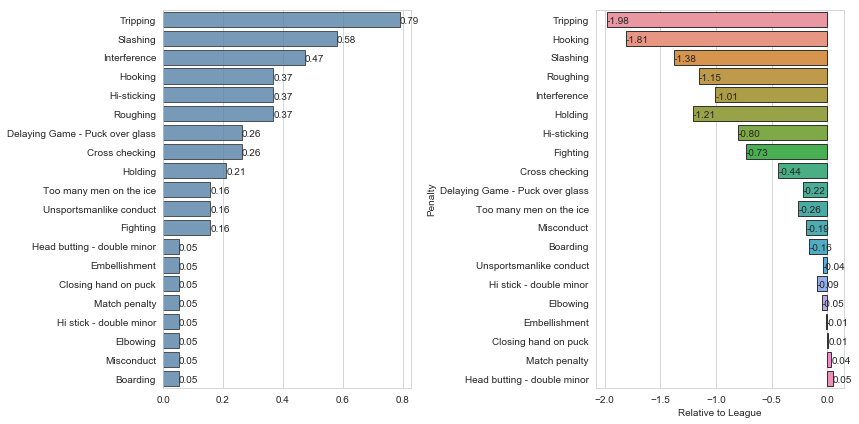

In [90]:
pensPerGameAgainst('PIT', 'PHI', pens)

In [76]:
time.sleep(1)